# TP4 - RNN
# Trinome:

# Wissal Fnaich
# Narjes Taghlet 
# Mariem Makni

# Class: RT4-1

## Installation

In [9]:
!pip install nltk
!pip install tensorflow
!pip install gensim



In [8]:
!pip check

conda-repo-cli 1.0.75 requires requests-mock, which is not installed.
conda-repo-cli 1.0.75 has requirement clyent==1.2.1, but you have clyent 1.2.2.
conda-repo-cli 1.0.75 has requirement PyYAML==6.0.1, but you have pyyaml 6.0.
python-lsp-black 1.2.1 has requirement black>=22.3.0, but you have black 0.0.


## Importation des bibliothèques :

In [1]:
import pandas as pd
import numpy as np
import re
import time
import nltk
from nltk.corpus import stopwords
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import Conv1D
from keras.layers import GlobalMaxPooling1D
from keras.layers import LSTM
from keras.layers import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from numpy import asarray, zeros
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, LSTM, GRU
from keras.losses import binary_crossentropy
from keras.optimizers import Adam
import time
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
from keras.losses import binary_crossentropy
from keras.optimizers import Adam


import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from numpy import array
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Dense
from tensorflow.keras.layers import Flatten, Conv1D, GlobalMaxPooling1D, LSTM , Embedding
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer

import warnings 

warnings.filterwarnings('ignore') 

## Importation du dataset :

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

file_path = 'IMDB Dataset.csv/IMDB Dataset.csv'  
movie_reviews = pd.read_csv(file_path)

## Data Understanding :

In [3]:
print("Dimension du dataset:", movie_reviews.shape)
print("Valeurs NULL dans chaque colonne:\n", movie_reviews.isnull().sum())

Dimension du dataset: (50000, 2)
Valeurs NULL dans chaque colonne:
 review       0
sentiment    0
dtype: int64


In [4]:
print("Les 5 premières lignes du dataset:\n", movie_reviews.head())

Les 5 premières lignes du dataset:
                                               review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


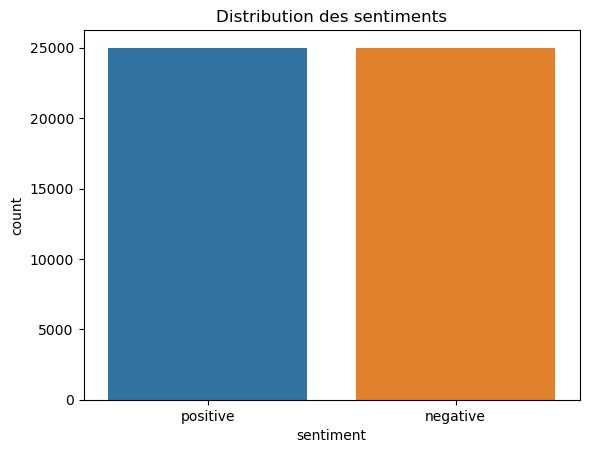

In [5]:
sns.countplot(x='sentiment', data=movie_reviews)
plt.title('Distribution des sentiments')
plt.show()

In [6]:
print("4ème review:", movie_reviews.loc[3, 'review']) 

4ème review: Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them.


## Prétraitement de données :

In [7]:
def preprocess_text(sen):
 sentence = remove_tags(sen)
 sentence = re.sub('[^a-zA-Z]', ' ', sentence)
 sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)
 sentence = re.sub(r'\s+', ' ', sentence)
 return sentence

def remove_tags(text):
    TAG_RE = re.compile(r'<[^>]+>')
    return TAG_RE.sub('', text)

In [8]:
X = []
sentences = list(movie_reviews['review'])
for sen in sentences:
    X.append(preprocess_text(sen))

print("4ème review prétraité:", X[3])

4ème review prétraité: Basically there a family where little boy Jake thinks there a zombie in his closet his parents are fighting all the time This movie is slower than soap opera and suddenly Jake decides to become Rambo and kill the zombie OK first of all when you re going to make film you must Decide if its thriller or drama As drama the movie is watchable Parents are divorcing arguing like in real life And then we have Jake with his closet which totally ruins all the film expected to see BOOGEYMAN similar movie and instead watched drama with some meaningless thriller spots out of just for the well playing parents descent dialogs As for the shots with Jake just ignore them 


4ème review: Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them.

In [9]:
y = movie_reviews['sentiment']
y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=42)

## La couche de l’embedding

In [11]:
#Ceci spécifie que seuls les 5000 mots les plus fréquents dans l'ensemble de données seront pris en compte. 
#Cela permet de gérer la taille du vocabulaire et de réduire la complexité du modèle.
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [12]:
print(X_train[0])

[9, 43, 786, 2121, 524, 299, 1, 104, 1860, 1989, 4281, 2, 782, 4786, 9, 1, 224, 1, 77, 763, 51, 49, 17, 97, 3, 1, 24, 1968, 98, 31, 23, 32, 116, 1101, 9, 6, 5, 2323, 1163, 4, 449, 43, 540, 4, 88, 28, 20, 37, 892, 397, 13, 1, 154, 4, 2935, 22, 4318, 18, 2897, 9, 42, 71, 218, 69, 123, 7, 76, 3100, 193, 18, 232, 2, 1, 427, 198, 4888, 147, 19, 60, 24, 13, 70, 358, 299, 16, 15, 6, 198, 25, 302, 9, 11, 1, 1820, 112, 413, 2, 11, 1, 1651, 562, 67, 419, 373, 82, 114, 43, 110, 361, 28, 33, 15, 41, 10, 88, 441, 13, 357, 1145, 59, 7, 1, 460, 214, 992, 4, 4124, 7, 174, 3, 32, 433, 680, 607, 9, 66, 227, 233, 107, 830, 33, 169, 27, 217, 9, 1, 423, 360, 53, 3696, 273, 157, 1672, 187, 5, 1, 711, 1904, 1, 1177, 3, 2838, 3672, 1652, 2, 144, 147, 225, 3, 203, 320, 2, 147, 1052, 14, 85, 3, 131, 2790, 15, 152, 95, 3, 1, 3974, 299, 8, 12, 975, 33, 1, 485, 2567, 242, 66, 72, 104, 104, 678, 57, 80, 66, 148, 1331, 4, 223, 131, 20, 4319, 29, 137, 205, 1123, 11, 4341, 29, 2276, 2, 7, 8, 5, 438, 11, 610, 3, 1, 703

In [13]:
vocab_size = len(tokenizer.word_index) + 1
#Cela garantit que toutes les entrées du modèle auront la même taille, ce qui est nécessaire pour l'entraînement de réseaux de neurones.
maxlen = 100
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [14]:
vocab_size

92547

In [15]:
from numpy import array
from numpy import asarray
from numpy import zeros
embeddings_dictionary = dict()
glove_file = open("glove.6B.100d.txt/glove.6B.100d.txt", encoding="utf8")
for line in glove_file:
 records = line.split()
 word = records[0]
    
 vector_dimensions = asarray(records[1:],dtype='float32')
 embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [16]:
embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
         embedding_matrix[index] = embedding_vector

## Classification avec un simple réseau de neurones

In [17]:
model = Sequential([
    Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen, trainable=False),
    Flatten(),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])


start_time = time.time()
history = model.fit(X_train, y_train, epochs=6, batch_size=128, verbose=1, validation_split=0.2)

end_time = time.time()
train_time = end_time - start_time
print("Training time for model: {:.2f} seconds".format(train_time))

Epoch 1/6
250/250 [==============================] - 2s 5ms/step - loss: 0.6135 - acc: 0.6602 - val_loss: 0.5475 - val_acc: 0.7195
Epoch 2/6
250/250 [==============================] - 1s 4ms/step - loss: 0.5037 - acc: 0.7563 - val_loss: 0.5223 - val_acc: 0.7379
Epoch 3/6
250/250 [==============================] - 1s 4ms/step - loss: 0.4645 - acc: 0.7813 - val_loss: 0.5158 - val_acc: 0.7471
Epoch 4/6
250/250 [==============================] - 1s 4ms/step - loss: 0.4402 - acc: 0.7978 - val_loss: 0.5177 - val_acc: 0.7480
Epoch 5/6
250/250 [==============================] - 1s 4ms/step - loss: 0.4272 - acc: 0.8046 - val_loss: 0.5343 - val_acc: 0.7416
Epoch 6/6
250/250 [==============================] - 1s 4ms/step - loss: 0.4102 - acc: 0.8154 - val_loss: 0.5408 - val_acc: 0.7391
Training time for model: 7.01 seconds


In [18]:
import tensorflow as tf
# from fvcore.nn import FlopCountAnalysis


def count_params_flops(model):
    num_params = tf.reduce_sum([tf.reduce_prod(var.shape) for var in model.trainable_variables]).numpy()
    return num_params

num_params = count_params_flops(model)
print("Number of parameters:", num_params)


# input_shape = (1, maxlen) 
# dummy_input = tf.ones(input_shape)

# flops = FlopCountAnalysis(model, (tf.ones(dummy_input)))
# total_flops = flops.total()

# print(f"Total FLOPs: {total_flops}")


Number of parameters: 10001


In [19]:
def predict_sentiment(model, review, tokenizer, maxlen=100):
    review = preprocess_text(review)

    sequence = tokenizer.texts_to_sequences([review])

    padded_sequence = pad_sequences(sequence, maxlen=maxlen, padding='post')

    prediction = model.predict(padded_sequence)

    sentiment = "positif" if prediction >= 0.5 else "négatif"

    return sentiment

In [20]:
review_text = "I am happy"
start_time = time.time()
predicted_sentiment = predict_sentiment(model, review_text, tokenizer)

end_time = time.time()
train_time = end_time - start_time
print("Le sentiment prédit pour la critique est :", predicted_sentiment)
print("Training time for model: {:.2f} seconds".format(train_time))

1/1 [==============================] - 0s 105ms/step
Le sentiment prédit pour la critique est : positif
Training time for model: 0.17 seconds


In [21]:
score = model.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.5433 - acc: 0.7407
Test Score: 0.5433378219604492
Test Accuracy: 0.7407000064849854


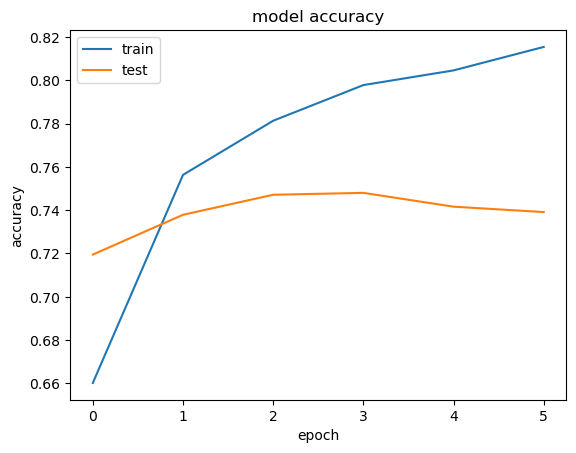

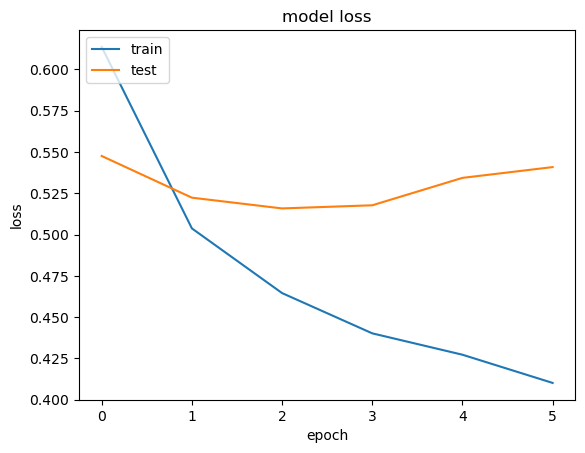

In [22]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

## Classification avec un réseau de neurones convolutionnel :

In [30]:
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Dense

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=100, weights=[embedding_matrix], input_length=maxlen),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    MaxPooling1D(),
    Flatten(),
    Dense(units=1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

start_time = time.time()
history = model.fit(X_train, y_train, epochs=6, batch_size=128, verbose=1, validation_split=0.2)

end_time = time.time()
train_time = end_time - start_time
print("Training time for model: {:.2f} seconds".format(train_time))


Epoch 1/6
250/250 [==============================] - 25s 93ms/step - loss: 0.5202 - acc: 0.7268 - val_loss: 0.3933 - val_acc: 0.8185
Epoch 2/6
250/250 [==============================] - 23s 93ms/step - loss: 0.3260 - acc: 0.8592 - val_loss: 0.3395 - val_acc: 0.8549
Epoch 3/6
250/250 [==============================] - 24s 96ms/step - loss: 0.2551 - acc: 0.8951 - val_loss: 0.3254 - val_acc: 0.8605
Epoch 4/6
250/250 [==============================] - 23s 93ms/step - loss: 0.1901 - acc: 0.9280 - val_loss: 0.3446 - val_acc: 0.8586
Epoch 5/6
250/250 [==============================] - 23s 91ms/step - loss: 0.1243 - acc: 0.9601 - val_loss: 0.3768 - val_acc: 0.8551
Epoch 6/6
250/250 [==============================] - 23s 91ms/step - loss: 0.0692 - acc: 0.9848 - val_loss: 0.4252 - val_acc: 0.8487
Training time for model: 140.96 seconds


In [31]:
num_params = count_params_flops(model)
print("Number of parameters:", num_params)

Number of parameters: 9324973


In [32]:
score = model.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.4109 - acc: 0.8503
Test Score: 0.41093721985816956
Test Accuracy: 0.8503000140190125


In [33]:
review_text = "I am happy"
start_time = time.time()
predicted_sentiment = predict_sentiment(model, review_text, tokenizer)

end_time = time.time()
train_time = end_time - start_time
print("Le sentiment prédit pour la critique est :", predicted_sentiment)
print("Training time for model: {:.2f} seconds".format(train_time))

1/1 [==============================] - 0s 106ms/step
Le sentiment prédit pour la critique est : positif
Training time for model: 0.19 seconds


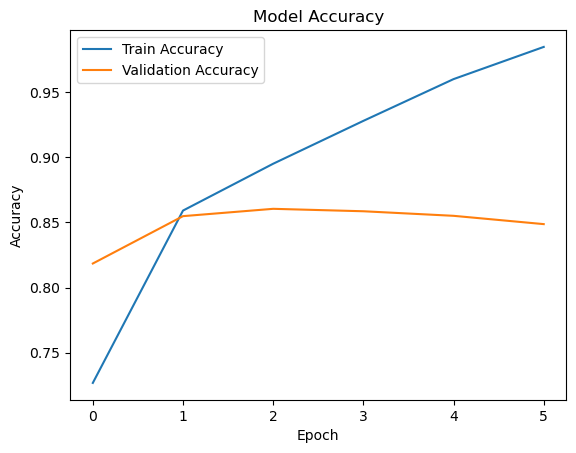

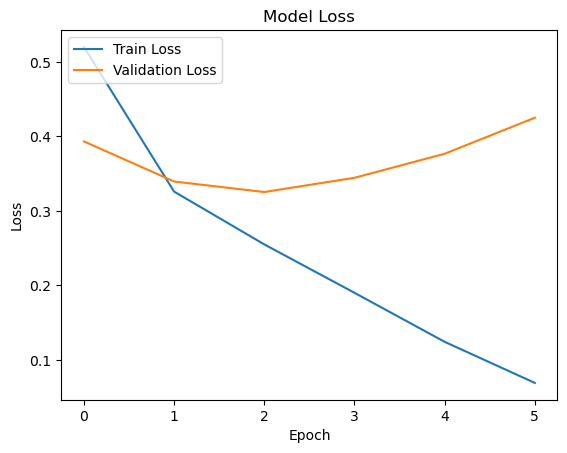

In [34]:
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

## Classification avec un réseau de neurones récurrent (LSTM) :

In [78]:
lstm = Sequential([
    Embedding(input_dim=vocab_size, output_dim=100, weights=[embedding_matrix], input_length=maxlen),
    LSTM(128),
    Flatten(),
    Dense(1, activation='sigmoid')
])

lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history = lstm.fit(X_train, y_train, epochs=6, batch_size=128, verbose=1, validation_split=0.2)

Epoch 1/6
250/250 [==============================] - 83s 326ms/step - loss: 0.5417 - acc: 0.7224 - val_loss: 0.4025 - val_acc: 0.8221
Epoch 2/6
250/250 [==============================] - 72s 288ms/step - loss: 0.3489 - acc: 0.8497 - val_loss: 0.3687 - val_acc: 0.8265
Epoch 3/6
250/250 [==============================] - 73s 294ms/step - loss: 0.2912 - acc: 0.8793 - val_loss: 0.3177 - val_acc: 0.8630
Epoch 4/6
250/250 [==============================] - 74s 296ms/step - loss: 0.2578 - acc: 0.8961 - val_loss: 0.3777 - val_acc: 0.8461
Epoch 5/6
250/250 [==============================] - 73s 293ms/step - loss: 0.2342 - acc: 0.9089 - val_loss: 0.3366 - val_acc: 0.8627
Epoch 6/6
250/250 [==============================] - 73s 291ms/step - loss: 0.2148 - acc: 0.9171 - val_loss: 0.3513 - val_acc: 0.8636


In [79]:
num_params = count_params_flops(lstm)
print("Number of parameters:", num_params)

Number of parameters: 9372077


In [80]:
score = lstm.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

313/313 [==============================] - 6s 19ms/step - loss: 0.3357 - acc: 0.8666
Test Score: 0.335705041885376
Test Accuracy: 0.866599977016449


In [81]:
review_text = "I am happy"
start_time = time.time()
predicted_sentiment = predict_sentiment(lstm, review_text, tokenizer)

end_time = time.time()
train_time = end_time - start_time
print("Le sentiment prédit pour la critique est :", predicted_sentiment)
print("Training time for model: {:.2f} seconds".format(train_time))

1/1 [==============================] - 0s 22ms/step
Le sentiment prédit pour la critique est : positif
Training time for model: 0.05 seconds


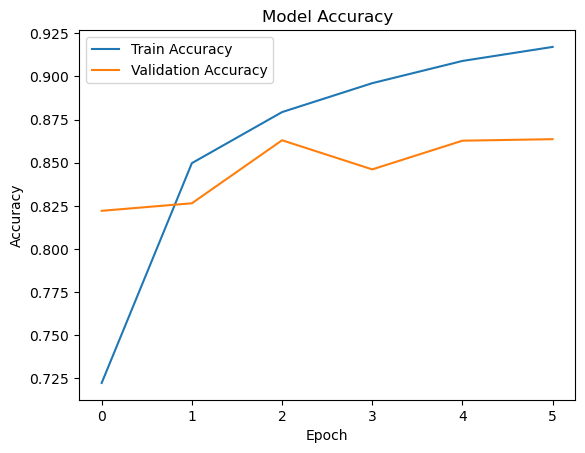

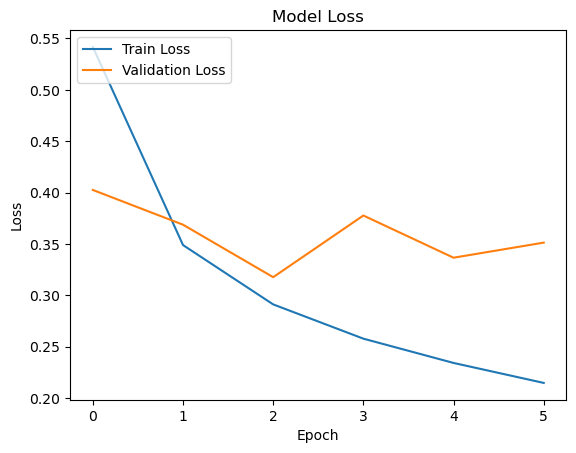

In [82]:
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

In [83]:
model_save_path = f"model/lstm_glove.h5"
lstm.save(model_save_path)
print(f"Model saved to {model_save_path}")

Model saved to model/lstm_glove.h5


## Compte rendu :

# Glove

## Classification avec un réseau de neurones récurrent (GRU)

In [35]:
from tensorflow.keras.layers import GRU

gru = Sequential([
    Embedding(input_dim=vocab_size, output_dim=100, weights=[embedding_matrix], input_length=maxlen),
    GRU(units=128),
    Flatten(),
    Dense(units=1, activation='sigmoid')
])

start_time = time.time()


gru.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history = gru.fit(X_train, y_train, epochs=6, batch_size=128, verbose=1, validation_split=0.2)

end_time = time.time()
train_time_gru = end_time - start_time
print("Training time for model: {:.2f} seconds".format(train_time_gru))

Epoch 1/6
250/250 [==============================] - 51s 189ms/step - loss: 0.4858 - acc: 0.7456 - val_loss: 0.3520 - val_acc: 0.8521
Epoch 2/6
250/250 [==============================] - 45s 179ms/step - loss: 0.3060 - acc: 0.8707 - val_loss: 0.3069 - val_acc: 0.8675
Epoch 3/6
250/250 [==============================] - 45s 180ms/step - loss: 0.2617 - acc: 0.8928 - val_loss: 0.3053 - val_acc: 0.8660
Epoch 4/6
250/250 [==============================] - 46s 183ms/step - loss: 0.2264 - acc: 0.9107 - val_loss: 0.3182 - val_acc: 0.8719
Epoch 5/6
250/250 [==============================] - 45s 181ms/step - loss: 0.1972 - acc: 0.9249 - val_loss: 0.3223 - val_acc: 0.8640
Epoch 6/6
250/250 [==============================] - 46s 184ms/step - loss: 0.1670 - acc: 0.9401 - val_loss: 0.3672 - val_acc: 0.8631
Training time for model: 277.20 seconds


In [85]:
num_params = count_params_flops(gru)
print("Number of parameters:", num_params)

Number of parameters: 9343149


In [86]:
score = gru.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

313/313 [==============================] - 4s 14ms/step - loss: 0.3477 - acc: 0.8683
Test Score: 0.34770116209983826
Test Accuracy: 0.8683000206947327


In [87]:
review_text = "I am happy"
start_time = time.time()
predicted_sentiment = predict_sentiment(gru, review_text, tokenizer)

end_time = time.time()
train_time = end_time - start_time
print("Le sentiment prédit pour la critique est :", predicted_sentiment)
print("Training time for model: {:.2f} seconds".format(train_time))

1/1 [==============================] - 0s 247ms/step
Le sentiment prédit pour la critique est : positif
Training time for model: 0.27 seconds


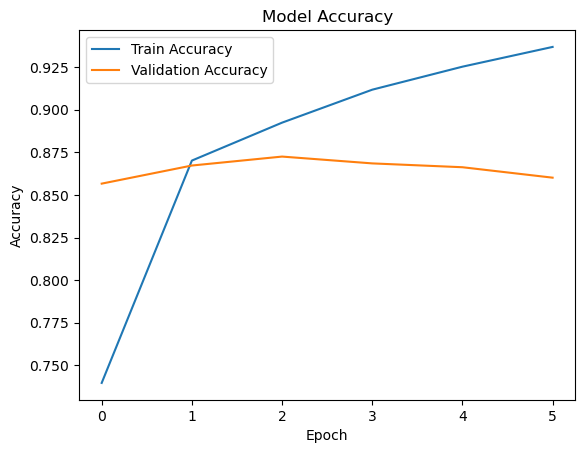

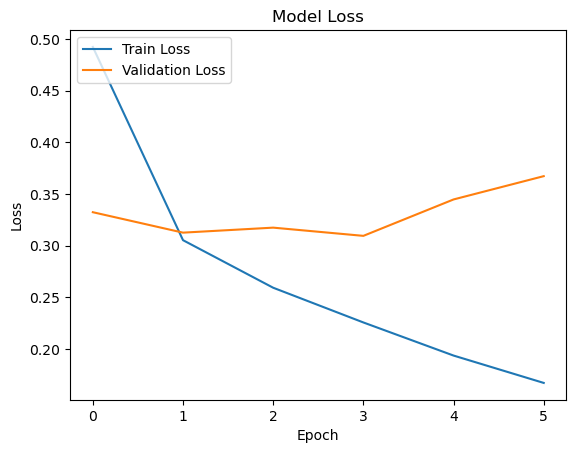

In [88]:
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

In [89]:
model_save_path = f"model/gru_glove.h5"
gru.save(model_save_path)
print(f"Model saved to {model_save_path}")

Model saved to model/gru_glove.h5


## Classification avec un réseau de neurones récurrent RCNN

In [92]:
from keras.layers import SimpleRNN, TimeDistributed

rcnn = Sequential([
    Embedding(input_dim=vocab_size, output_dim=100, weights=[embedding_matrix], input_length=maxlen),
    Conv1D(filters=128, kernel_size=5, activation='relu', padding='same'),
    MaxPooling1D(pool_size=2),
    SimpleRNN(units=128, return_sequences=True),
    TimeDistributed(Dense(64)),
    Flatten(),
    Dense(1, activation='sigmoid')
])

rcnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history = rcnn.fit(X_train, y_train, epochs=6, batch_size=128, verbose=1, validation_split=0.2)

end_time = time.time()
train_time_gru = end_time - start_time
print("Training time for model: {:.2f} seconds".format(train_time_gru))

Epoch 1/6
250/250 [==============================] - 48s 190ms/step - loss: 0.5566 - acc: 0.6986 - val_loss: 0.4256 - val_acc: 0.8046
Epoch 2/6
250/250 [==============================] - 47s 189ms/step - loss: 0.3390 - acc: 0.8518 - val_loss: 0.3402 - val_acc: 0.8501
Epoch 3/6
250/250 [==============================] - 47s 190ms/step - loss: 0.2548 - acc: 0.8959 - val_loss: 0.3496 - val_acc: 0.8474
Epoch 4/6
250/250 [==============================] - 47s 190ms/step - loss: 0.1822 - acc: 0.9286 - val_loss: 0.4882 - val_acc: 0.8110
Epoch 5/6
250/250 [==============================] - 48s 191ms/step - loss: 0.0974 - acc: 0.9657 - val_loss: 0.5213 - val_acc: 0.8404
Epoch 6/6
250/250 [==============================] - 48s 191ms/step - loss: 0.0508 - acc: 0.9829 - val_loss: 0.6746 - val_acc: 0.8349
Training time for model: 407.83 seconds


In [93]:
num_params = count_params_flops(rcnn)
print("Number of parameters:", num_params)

Number of parameters: 9363181


In [94]:
score = rcnn.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

313/313 [==============================] - 2s 6ms/step - loss: 0.6220 - acc: 0.8419
Test Score: 0.6219660043716431
Test Accuracy: 0.8418999910354614


In [95]:
review_text = "I am happy"
start_time = time.time()
predicted_sentiment = predict_sentiment(rcnn, review_text, tokenizer)

end_time = time.time()
train_time = end_time - start_time
print("Le sentiment prédit pour la critique est :", predicted_sentiment)
print("Training time for model: {:.2f} seconds".format(train_time))

1/1 [==============================] - 0s 143ms/step
Le sentiment prédit pour la critique est : positif
Training time for model: 0.18 seconds


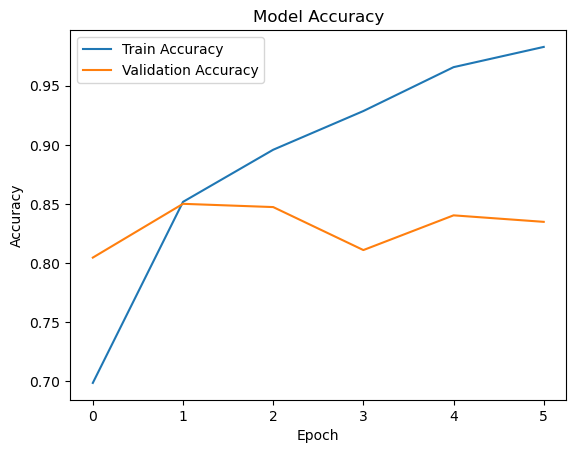

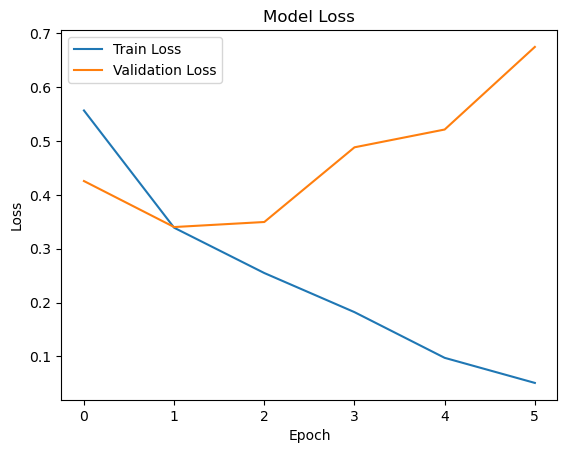

In [96]:
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

In [97]:
model_save_path = f"model/rcnn_glove.h5"
gru.save(model_save_path)
print(f"Model saved to {model_save_path}")

Model saved to model/rcnn_glove.h5


## Make Previous Code into functions for easier Manipulation

In [62]:
from numpy import zeros, asarray
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


# tokenizer = Tokenizer(num_words=5000)
# tokenizer.fit_on_texts(X_train)
def create_and_fit_tokenizer(texts, max_words=5000):
    tokenizer = Tokenizer(num_words=max_words)
    tokenizer.fit_on_texts(texts)
    return tokenizer

# X_train = tokenizer.texts_to_sequences(X_train)
# X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)

def preprocess_sequences(tokenizer, sequences, maxlen):
    sequences = tokenizer.texts_to_sequences(sequences)
    padded_sequences = pad_sequences(sequences, padding='post', maxlen=maxlen)
    return padded_sequences
# vocab_size = len(tokenizer.word_index) + 1
# embeddings_dictionary = dict()

# glove_file = open("glove.6B.100d.txt/glove.6B.100d.txt", encoding="utf8")
# for line in glove_file:
#  records = line.split()
#  word = records[0]
#  vector_dimensions = asarray(records[1:],dtype='float32')
#  embeddings_dictionary [word] = vector_dimensions
# glove_file.close()
# embedding_matrix = zeros((vocab_size, 100))
# for word, index in tokenizer.word_index.items():
#     embedding_vector = embeddings_dictionary.get(word)
#     if embedding_vector is not None:
#          embedding_matrix[index] = embedding_vector

def create_embedding_matrix(tokenizer, embeddings_file, embedding_dim=100):
    vocab_size = len(tokenizer.word_index) + 1
    embedding_matrix = zeros((vocab_size, embedding_dim))
    embeddings_dictionary = dict()

    with open(embeddings_file, 'r', encoding='utf8') as file:
        next(file)
        for line in file:
            records = line.split()
            word = records[0]
            try:
                vector_dimensions = asarray(records[1:], dtype='float32')
                embeddings_dictionary[word] = vector_dimensions
            except ValueError:
                continue


    for word, index in tokenizer.word_index.items():
        embedding_vector = embeddings_dictionary.get(word)
        if embedding_vector is not None:
            embedding_matrix[index] = embedding_vector

    return embedding_matrix

In [63]:
import time
from keras.models import Sequential
from keras.layers import SimpleRNN, Embedding, LSTM, GRU, Conv1D, MaxPooling1D, Flatten, Dense, TimeDistributed
from keras.losses import binary_crossentropy
from keras.optimizers import Adam

def train_and_evaluate_model(model_type, embedding_matrix, X_train, y_train, X_test, y_test, vocab_size, maxlen):
    model = Sequential()
    model.add(Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen))

    if model_type == 'lstm':
        model.add(LSTM(units=128))
    elif model_type == 'gru':
        model.add(GRU(units=128))
    elif model_type == 'crnn':
        model.add(Conv1D(filters=128, kernel_size=5, activation='relu', padding='same'))
        model.add(MaxPooling1D(pool_size=2))
        model.add(SimpleRNN(units=128, return_sequences=True))
        model.add(TimeDistributed(Dense(64)))
        model.add(Flatten())

    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(loss=binary_crossentropy, optimizer='adam', metrics=['acc'])
    

    start_time = time.time()
    history = model.fit(X_train, y_train, epochs=6, batch_size=128, verbose=1, validation_split=0.2)
    end_time = time.time()
    train_time = end_time - start_time
    print(f"Training time for {model_type} : {train_time:.2f} seconds")
    
    score = model.evaluate(X_test, y_test, verbose=1)
    print(f"Test Loss for {model_type}:", score[0])
    print(f"Test Accuracy for {model_type}:", score[1])
    
    
    num_params = count_params_flops(model)
    print("Number of parameters:", num_params)


    review_text = "I am happy"
    start_time = time.time()
    predicted_sentiment = predict_sentiment(model, review_text, tokenizer)

    end_time = time.time()
    train_time = end_time - start_time
    print("Le sentiment prédit pour la critique est :", predicted_sentiment)
    print("Inference time for model: {:.2f} seconds".format(train_time))
    
    
    plt.plot(history.history['acc'], label='Train Accuracy')
    plt.plot(history.history['val_acc'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.show()

    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.show()
     

    return model, history, score

In [64]:
def predict_sentiment(model, review, tokenizer, maxlen=100):
    review = preprocess_text(review)

    sequence = tokenizer.texts_to_sequences([review])

    padded_sequence = pad_sequences(sequence, maxlen=maxlen, padding='post')

    prediction = model.predict(padded_sequence)

    sentiment = "positif" if prediction >= 0.5 else "négatif"

    return sentiment

In [65]:
import tensorflow as tf
# from fvcore.nn import FlopCountAnalysis


def count_params_flops(model):
    num_params = tf.reduce_sum([tf.reduce_prod(var.shape) for var in model.trainable_variables]).numpy()
    return num_params

# num_params = count_params_flops(model)
# print("Number of parameters:", num_params)


# Word2Vec

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=42)

In [35]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)
maxlen = 100
tokenizer = create_and_fit_tokenizer(X_train)
X_train = preprocess_sequences(tokenizer, X_train, maxlen)
X_test = preprocess_sequences(tokenizer, X_test, maxlen)

92547


In [36]:
embedding_matrix_word2vec = create_embedding_matrix(tokenizer, "../enwiki_20180420_100d.txt")

------------------------------lstm-------------------------
Epoch 1/6
250/250 [==============================] - 100s 393ms/step - loss: 0.4965 - acc: 0.7499 - val_loss: 0.3652 - val_acc: 0.8401
Epoch 2/6
250/250 [==============================] - 93s 370ms/step - loss: 0.3378 - acc: 0.8579 - val_loss: 0.3347 - val_acc: 0.8522
Epoch 3/6
250/250 [==============================] - 92s 369ms/step - loss: 0.2921 - acc: 0.8807 - val_loss: 0.3423 - val_acc: 0.8560
Epoch 4/6
250/250 [==============================] - 93s 373ms/step - loss: 0.2612 - acc: 0.8952 - val_loss: 0.3338 - val_acc: 0.8554
Epoch 5/6
250/250 [==============================] - 93s 372ms/step - loss: 0.2396 - acc: 0.9057 - val_loss: 0.3360 - val_acc: 0.8511
Epoch 6/6
250/250 [==============================] - 93s 371ms/step - loss: 0.2239 - acc: 0.9132 - val_loss: 0.3659 - val_acc: 0.8550
Training time for lstm : 563.47 seconds
313/313 [==============================] - 8s 25ms/step - loss: 0.3436 - acc: 0.8630
Test Loss 

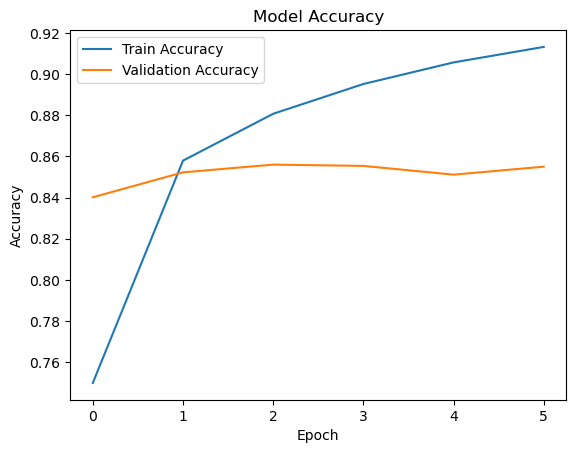

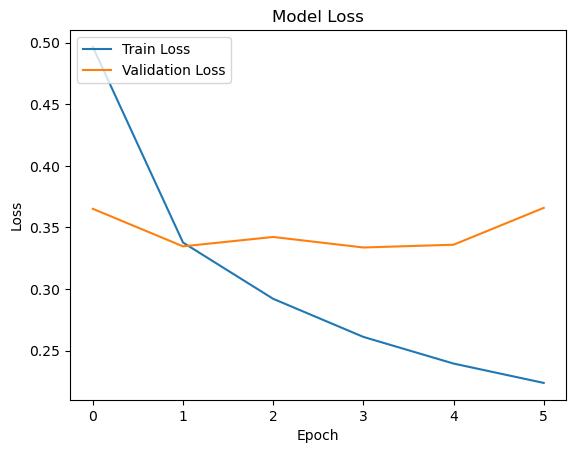

------------------------------gru-------------------------
Epoch 1/6
250/250 [==============================] - 78s 309ms/step - loss: 0.4763 - acc: 0.7544 - val_loss: 0.3431 - val_acc: 0.8551
Epoch 2/6
250/250 [==============================] - 65s 262ms/step - loss: 0.3088 - acc: 0.8691 - val_loss: 0.3394 - val_acc: 0.8520
Epoch 3/6
250/250 [==============================] - 66s 265ms/step - loss: 0.2615 - acc: 0.8938 - val_loss: 0.3114 - val_acc: 0.8633
Epoch 4/6
250/250 [==============================] - 66s 265ms/step - loss: 0.2321 - acc: 0.9078 - val_loss: 0.3162 - val_acc: 0.8654
Epoch 5/6
250/250 [==============================] - 66s 265ms/step - loss: 0.2008 - acc: 0.9245 - val_loss: 0.3280 - val_acc: 0.8684
Epoch 6/6
250/250 [==============================] - 66s 264ms/step - loss: 0.1700 - acc: 0.9367 - val_loss: 0.3564 - val_acc: 0.8624
Training time for gru : 408.20 seconds
313/313 [==============================] - 4s 14ms/step - loss: 0.3431 - acc: 0.8668
Test Loss for

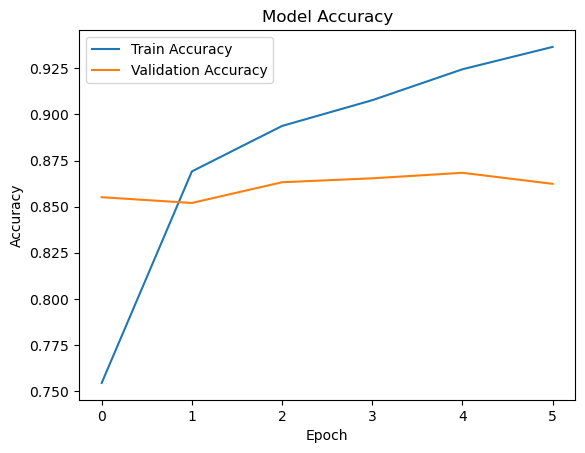

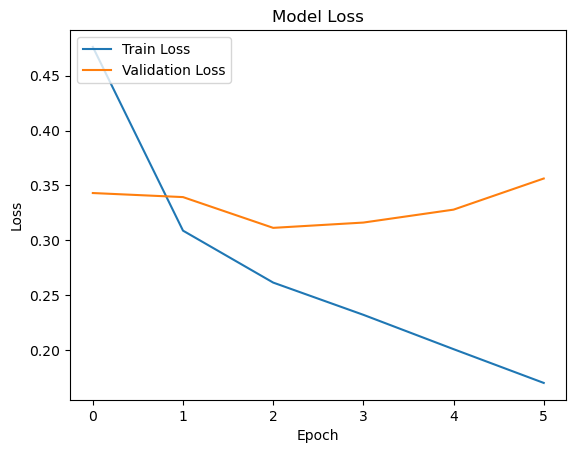

------------------------------crnn-------------------------
Epoch 1/6
250/250 [==============================] - 60s 233ms/step - loss: 0.5685 - acc: 0.6776 - val_loss: 0.3957 - val_acc: 0.8257
Epoch 2/6
250/250 [==============================] - 58s 233ms/step - loss: 0.3249 - acc: 0.8614 - val_loss: 0.3428 - val_acc: 0.8480
Epoch 3/6
250/250 [==============================] - 59s 236ms/step - loss: 0.2381 - acc: 0.9037 - val_loss: 0.3643 - val_acc: 0.8425
Epoch 4/6
250/250 [==============================] - 59s 234ms/step - loss: 0.1527 - acc: 0.9421 - val_loss: 0.4635 - val_acc: 0.8304
Epoch 5/6
250/250 [==============================] - 58s 233ms/step - loss: 0.0776 - acc: 0.9719 - val_loss: 0.5909 - val_acc: 0.8256
Epoch 6/6
250/250 [==============================] - 58s 233ms/step - loss: 0.0351 - acc: 0.9881 - val_loss: 0.7483 - val_acc: 0.8325
Training time for crnn : 351.90 seconds
313/313 [==============================] - 3s 10ms/step - loss: 0.7039 - acc: 0.8390
Test Loss f

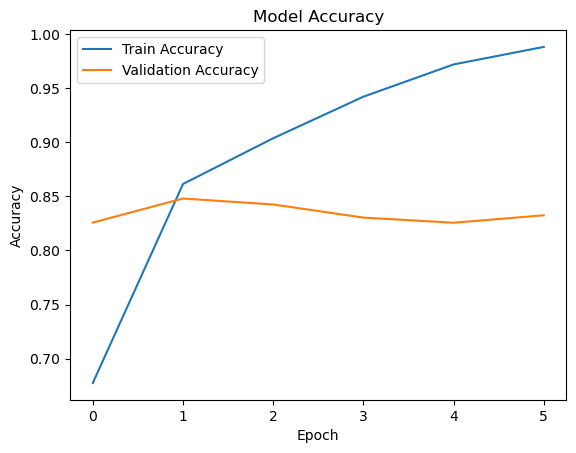

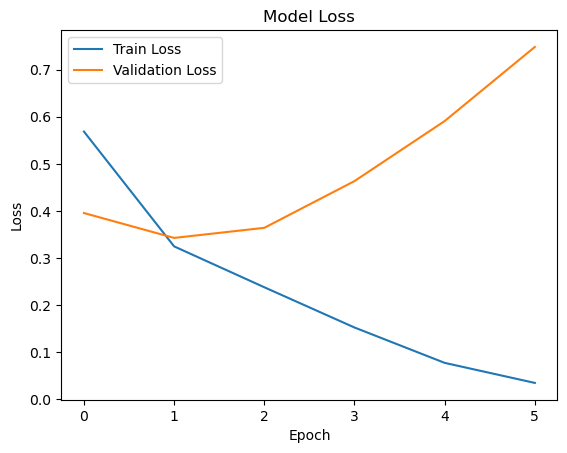

In [53]:
models = ['lstm', 'gru', 'crnn']
for model_type in models:
    print(f"------------------------------{model_type}-------------------------")
    train_and_evaluate_model(model_type, embedding_matrix_word2vec, X_train, y_train, X_test, y_test, vocab_size, maxlen)

# Fasttext:

In [15]:
from gensim.models.fasttext import FastText as FT_gensim
from gensim.models.fasttext import load_facebook_vectors
fasttext_model = load_facebook_vectors("cc.en.300.bin/cc.en.300.bin")

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=42)

In [28]:
tokenizer = create_and_fit_tokenizer(X_train)
X_train = preprocess_sequences(tokenizer, X_train, maxlen=300)
X_test = preprocess_sequences(tokenizer, X_test, maxlen=300)

In [29]:
embedding_matrix_fasttext = create_embedding_matrix(tokenizer.word_index, fasttext_model)
vocab_size = len(tokenizer.word_index) + 1

In [26]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

def create_and_fit_tokenizer(texts, max_words=5000):
    tokenizer = Tokenizer(num_words=max_words)
    tokenizer.fit_on_texts(texts)
    return tokenizer

def preprocess_sequences(tokenizer, sequences, maxlen):
    sequences = tokenizer.texts_to_sequences(sequences)
    padded_sequences = pad_sequences(sequences, padding='post', maxlen=maxlen)
    return padded_sequences

In [27]:
def create_embedding_matrix(word_index, fasttext_model):
    embedding_dim = fasttext_model.vector_size
    vocab_size = len(word_index) + 1
    embedding_matrix = np.zeros((vocab_size, embedding_dim))
    for word, index in word_index.items():
        if word in fasttext_model.key_to_index:
            embedding_matrix[index] = fasttext_model[word]
    return embedding_matrix

In [30]:
print( embedding_matrix_fasttext.shape[1])

300


In [37]:
import time
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Embedding, LSTM, GRU, Conv1D, MaxPooling1D, SimpleRNN, Dense, Flatten, TimeDistributed
from keras.losses import binary_crossentropy
from keras import backend as K
from keras.preprocessing.sequence import pad_sequences

def train_and_evaluate_model(model_type, embedding_matrix, X_train, y_train, X_test, y_test, vocab_size, maxlen, save_path, results_file, embedding_name, tokenizer):
    model = Sequential()
    model.add(Embedding(vocab_size, embedding_matrix.shape[1], weights=[embedding_matrix], input_length=maxlen, trainable=False))

    if model_type == 'lstm':
        model.add(LSTM(units=128))
    elif model_type == 'gru':
        model.add(GRU(units=128))
    elif model_type == 'crnn':
        model.add(Conv1D(filters=128, kernel_size=5, activation='relu', padding='same'))
        model.add(MaxPooling1D(pool_size=2))
        model.add(SimpleRNN(units=128, return_sequences=True))
        model.add(TimeDistributed(Dense(64)))
        model.add(Flatten())

    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(loss=binary_crossentropy, optimizer='adam', metrics=['acc'])

    start_time = time.time()
    history = model.fit(X_train, y_train, epochs=10, batch_size=128, verbose=1, validation_split=0.2)
    end_time = time.time()
    train_time = end_time - start_time
    print(f"Training time for {model_type} : {train_time:.2f} seconds")

    score = model.evaluate(X_test, y_test, verbose=1)
    print(f"Test Loss for {model_type}:", score[0])
    print(f"Test Accuracy for {model_type}:", score[1])

    num_params = model.count_params()
    print("Number of parameters:", num_params)

    review_text = "I am happy"
    review_sequence = tokenizer.texts_to_sequences([review_text])
    review_padded = pad_sequences(review_sequence, maxlen=maxlen)
    start_time = time.time()
    predicted_sentiment = model.predict(review_padded)
    end_time = time.time()
    prediction_time = end_time - start_time
    print("Le sentiment prédit pour la critique est :", predicted_sentiment[0][0])
    print("Inference time for model: {:.2f} seconds".format(prediction_time))

    plt.plot(history.history['acc'], label='Train Accuracy')
    plt.plot(history.history['val_acc'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.show()

    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.show()

    model_save_path = f"{save_path}/{model_type}_{embedding_name}_model.h5"
    model.save(model_save_path)
    print(f"Model saved to {model_save_path}")

    with open(results_file, 'a') as file:
        file.write(f"{model_type} with {embedding_name}: Loss = {score[0]}, Accuracy = {score[1]}, Parameters = {num_params}\n")

    K.clear_session() 

    return model, history, score


------------------------------lstm-------------------------
Epoch 1/10
250/250 [==============================] - 119s 458ms/step - loss: 0.6871 - acc: 0.5305 - val_loss: 0.6770 - val_acc: 0.5366
Epoch 2/10
250/250 [==============================] - 117s 466ms/step - loss: 0.6599 - acc: 0.6030 - val_loss: 0.6941 - val_acc: 0.5020
Epoch 3/10
250/250 [==============================] - 107s 428ms/step - loss: 0.6873 - acc: 0.5381 - val_loss: 0.6895 - val_acc: 0.5209
Epoch 4/10
250/250 [==============================] - 116s 462ms/step - loss: 0.6869 - acc: 0.5233 - val_loss: 0.6830 - val_acc: 0.5264
Epoch 5/10
250/250 [==============================] - 92s 366ms/step - loss: 0.6879 - acc: 0.5248 - val_loss: 0.6879 - val_acc: 0.5204
Epoch 6/10
250/250 [==============================] - 90s 362ms/step - loss: 0.6776 - acc: 0.5378 - val_loss: 0.6799 - val_acc: 0.5340
Epoch 7/10
250/250 [==============================] - 82s 328ms/step - loss: 0.6800 - acc: 0.5314 - val_loss: 0.6835 - val_acc

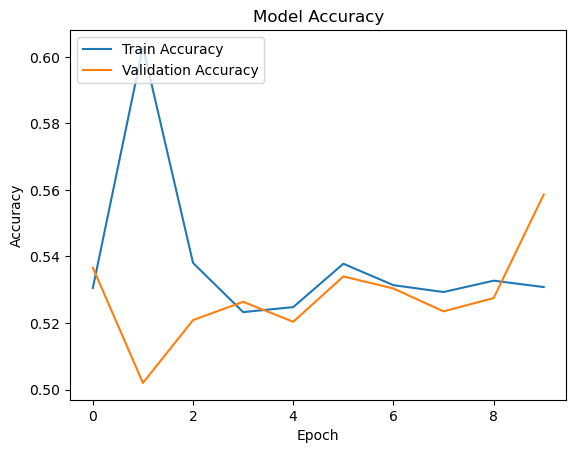

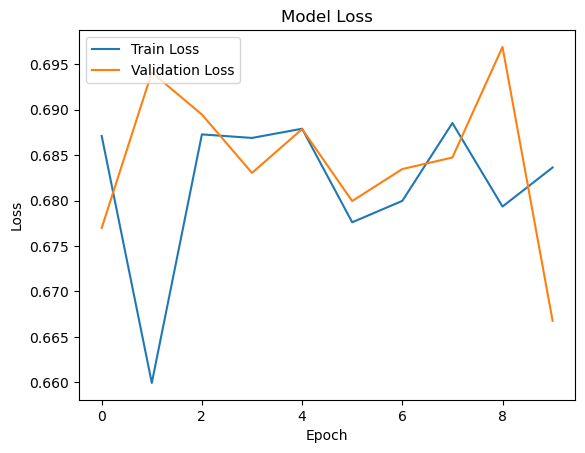

Model saved to models/lstm_fasttext_model.h5
------------------------------gru-------------------------
Epoch 1/10
250/250 [==============================] - 89s 348ms/step - loss: 0.6872 - acc: 0.5239 - val_loss: 0.6846 - val_acc: 0.5268
Epoch 2/10
250/250 [==============================] - 87s 348ms/step - loss: 0.6790 - acc: 0.5333 - val_loss: 0.6748 - val_acc: 0.5397
Epoch 3/10
250/250 [==============================] - 86s 344ms/step - loss: 0.6694 - acc: 0.5565 - val_loss: 0.6973 - val_acc: 0.5343
Epoch 4/10
250/250 [==============================] - 87s 346ms/step - loss: 0.6074 - acc: 0.6538 - val_loss: 0.4523 - val_acc: 0.8039
Epoch 5/10
250/250 [==============================] - 85s 340ms/step - loss: 0.3700 - acc: 0.8391 - val_loss: 0.3482 - val_acc: 0.8455
Epoch 6/10
250/250 [==============================] - 82s 326ms/step - loss: 0.3198 - acc: 0.8633 - val_loss: 0.3029 - val_acc: 0.8696
Epoch 7/10
250/250 [==============================] - 90s 359ms/step - loss: 0.2972 - 

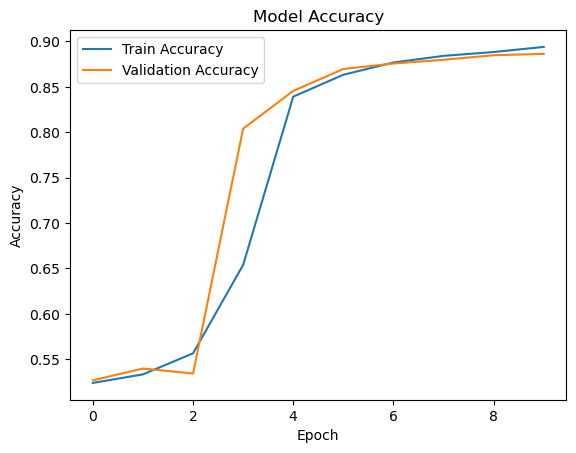

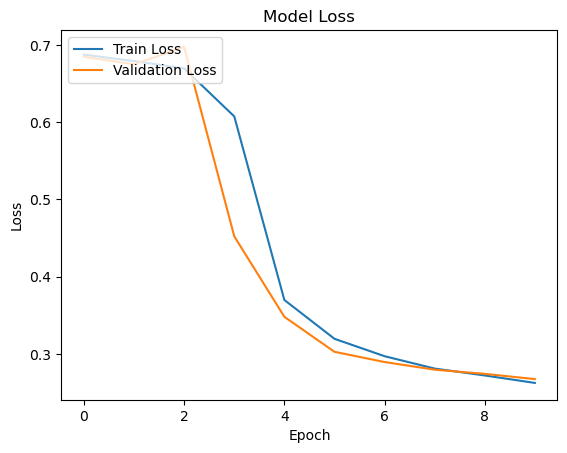

Model saved to models/gru_fasttext_model.h5
------------------------------crnn-------------------------

Epoch 1/10
250/250 [==============================] - 51s 189ms/step - loss: 0.5149 - acc: 0.7368 - val_loss: 0.4071 - val_acc: 0.8238
Epoch 2/10
250/250 [==============================] - 43s 173ms/step - loss: 0.3789 - acc: 0.8347 - val_loss: 0.4066 - val_acc: 0.8183
Epoch 3/10
250/250 [==============================] - 41s 165ms/step - loss: 0.3039 - acc: 0.8728 - val_loss: 0.4172 - val_acc: 0.8227
Epoch 4/10
250/250 [==============================] - 41s 164ms/step - loss: 0.2554 - acc: 0.8962 - val_loss: 0.3542 - val_acc: 0.8509
Epoch 5/10
250/250 [==============================] - 45s 178ms/step - loss: 0.1942 - acc: 0.9238 - val_loss: 0.3925 - val_acc: 0.8465
Epoch 6/10
250/250 [==============================] - 40s 161ms/step - loss: 0.1496 - acc: 0.9424 - val_loss: 0.4134 - val_acc: 0.8380
Epoch 7/10
250/250 [==============================] - 40s 161ms/step - loss: 0.1201 -

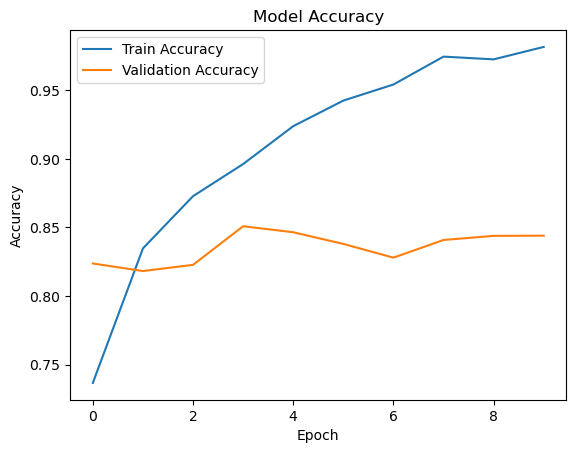

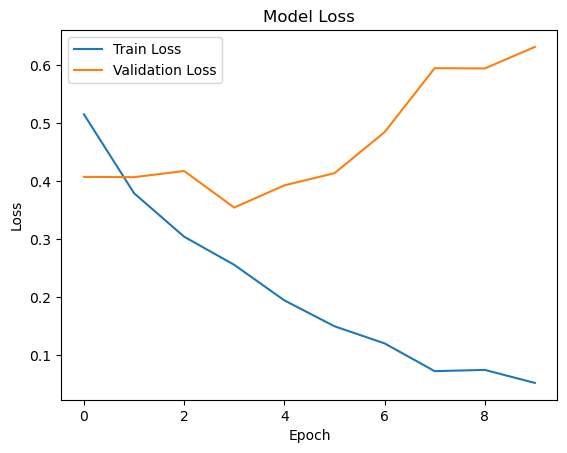

Model saved to models/crnn_fasttext_model.h5


In [38]:
save_path = 'models'
results_file = 'results.txt'
models = ['lstm', 'gru', 'crnn']
embedding_name = 'fasttext'  
maxlen = 300 
for model_type in models:
    print(f"------------------------------{model_type}-------------------------")
    train_and_evaluate_model(
        model_type=model_type,
        embedding_matrix=embedding_matrix_fasttext,
        X_train=X_train,
        y_train=y_train,
        X_test=X_test,
        y_test=y_test,
        vocab_size=vocab_size,
        maxlen=maxlen,
        save_path=save_path,
        results_file=results_file,
        embedding_name=embedding_name,
        tokenizer=tokenizer
    )



# Tf-idf

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=42)

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=10000)  

X_train = vectorizer.fit_transform(X_train).toarray()

X_test = vectorizer.transform(X_test).toarray()

vocab_size = X_train.shape[1]

In [31]:
from keras.layers import Reshape
from keras import backend as K
from keras.layers import Embedding, LSTM, GRU, Conv1D, MaxPooling1D, SimpleRNN, Dense, Flatten, TimeDistributed

def train_and_evaluate_model(model_type, X_train, y_train, X_test, y_test):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Reshape((128, 1)))  
    if model_type == 'lstm':
        model.add(LSTM(units=128))
    elif model_type == 'gru':
        model.add(GRU(units=128))
    elif model_type == 'crnn':
        model.add(Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'))
        model.add(SimpleRNN(units=128, return_sequences=True))  
        model.add(GlobalMaxPooling1D())  
        model.add(Dense(64, activation='relu'))  

    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss=binary_crossentropy, optimizer=Adam(), metrics=['accuracy'])

    start_time = time.time()
    history = model.fit(X_train, y_train, epochs=6, batch_size=128, verbose=1, validation_split=0.2)
    end_time = time.time()
    train_time = end_time - start_time
    print(f"Training time for {model_type}: {train_time:.2f} seconds")

    score = model.evaluate(X_test, y_test, verbose=1)
    print(f"Test Loss for {model_type}: {score[0]}")
    print(f"Test Accuracy for {model_type}: {score[1]}")

    num_params = model.count_params()
    print("Number of parameters:", num_params)

    review_text = "I am happy"
    review_sequence = tokenizer.texts_to_sequences([review_text])
    review_padded = pad_sequences(review_sequence, 10000)
    start_time = time.time()
    predicted_sentiment = model.predict(review_padded)
    end_time = time.time()
    prediction_time = end_time - start_time
    print("Le sentiment prédit pour la critique est :", predicted_sentiment[0][0])
    print("Inference time for model: {:.2f} seconds".format(prediction_time))

    plt.plot(history.history['accuracy'], label='Train Accuracy')  # Change 'acc' to 'accuracy'
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # Change 'val_acc' to 'val_accuracy'
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.show()


    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.show()

    K.clear_session() 

    return model, history, score


--------------------------------------------------------------------------lstm-----------------------------------------------------------------------
Epoch 1/6
250/250 [==============================] - 44s 172ms/step - loss: 0.4645 - accuracy: 0.7535 - val_loss: 0.2596 - val_accuracy: 0.8923
Epoch 2/6
250/250 [==============================] - 42s 167ms/step - loss: 0.1978 - accuracy: 0.9234 - val_loss: 0.2754 - val_accuracy: 0.8876
Epoch 3/6
250/250 [==============================] - 44s 175ms/step - loss: 0.1353 - accuracy: 0.9490 - val_loss: 0.3246 - val_accuracy: 0.8825
Epoch 4/6
250/250 [==============================] - 42s 169ms/step - loss: 0.0897 - accuracy: 0.9661 - val_loss: 0.4144 - val_accuracy: 0.8744
Epoch 5/6
250/250 [==============================] - 41s 163ms/step - loss: 0.0469 - accuracy: 0.9813 - val_loss: 0.4865 - val_accuracy: 0.8705
Epoch 6/6
250/250 [==============================] - 41s 164ms/step - loss: 0.0319 - accuracy: 0.9884 - val_loss: 0.5191 - val_acc

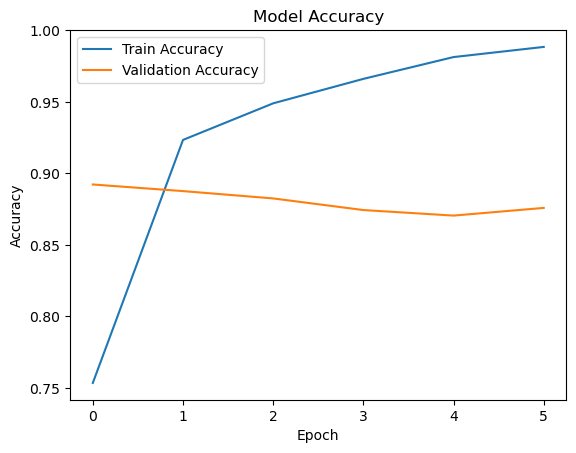

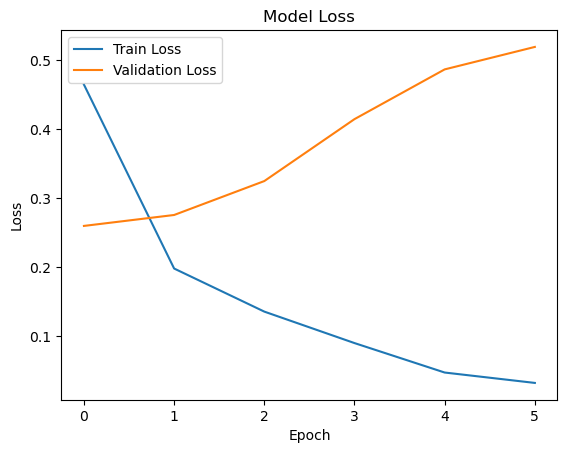

--------------------------------------------------------------------------gru-----------------------------------------------------------------------
Epoch 1/6
250/250 [==============================] - 38s 148ms/step - loss: 0.3920 - accuracy: 0.8133 - val_loss: 0.2626 - val_accuracy: 0.8896
Epoch 2/6
250/250 [==============================] - 37s 147ms/step - loss: 0.1938 - accuracy: 0.9272 - val_loss: 0.2824 - val_accuracy: 0.8900
Epoch 3/6
250/250 [==============================] - 37s 149ms/step - loss: 0.1424 - accuracy: 0.9471 - val_loss: 0.3414 - val_accuracy: 0.8832
Epoch 4/6
250/250 [==============================] - 36s 143ms/step - loss: 0.0983 - accuracy: 0.9648 - val_loss: 0.3594 - val_accuracy: 0.8774
Epoch 5/6
250/250 [==============================] - 36s 143ms/step - loss: 0.0724 - accuracy: 0.9758 - val_loss: 0.4083 - val_accuracy: 0.8760
Epoch 6/6
250/250 [==============================] - 37s 150ms/step - loss: 0.0537 - accuracy: 0.9815 - val_loss: 0.4220 - val_accu

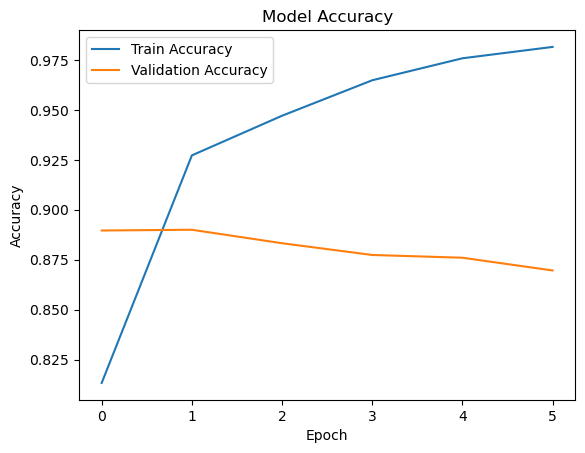

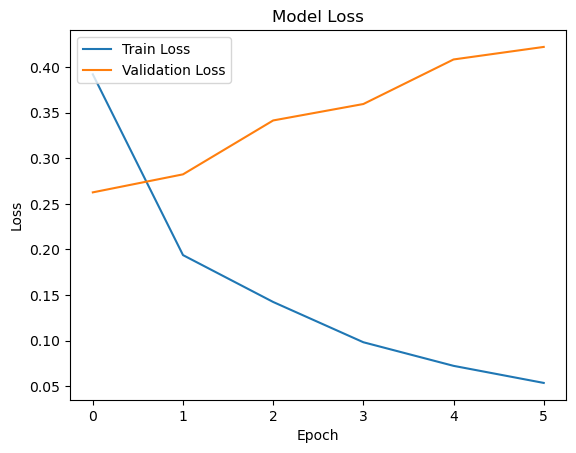

--------------------------------------------------------------------------crnn-----------------------------------------------------------------------
Epoch 1/6
250/250 [==============================] - 24s 90ms/step - loss: 0.4459 - accuracy: 0.7804 - val_loss: 0.2977 - val_accuracy: 0.8749
Epoch 2/6
250/250 [==============================] - 21s 84ms/step - loss: 0.2931 - accuracy: 0.8848 - val_loss: 0.3013 - val_accuracy: 0.8804
Epoch 3/6
250/250 [==============================] - 21s 83ms/step - loss: 0.1783 - accuracy: 0.9364 - val_loss: 0.3135 - val_accuracy: 0.8842
Epoch 4/6
250/250 [==============================] - 21s 82ms/step - loss: 0.1063 - accuracy: 0.9638 - val_loss: 0.3982 - val_accuracy: 0.8714
Epoch 5/6
250/250 [==============================] - 21s 85ms/step - loss: 0.0614 - accuracy: 0.9791 - val_loss: 0.4590 - val_accuracy: 0.8717
Epoch 6/6
250/250 [==============================] - 21s 82ms/step - loss: 0.0441 - accuracy: 0.9846 - val_loss: 0.4996 - val_accuracy:

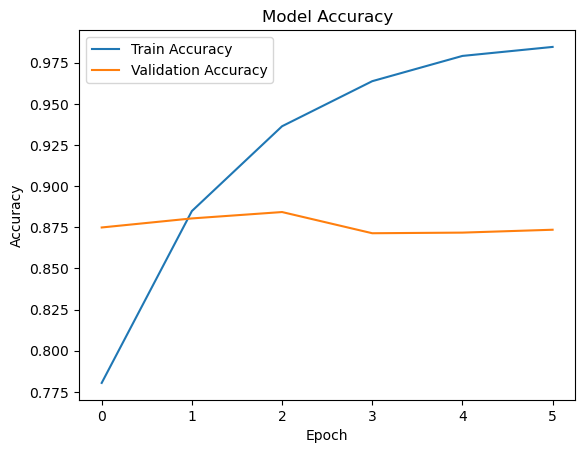

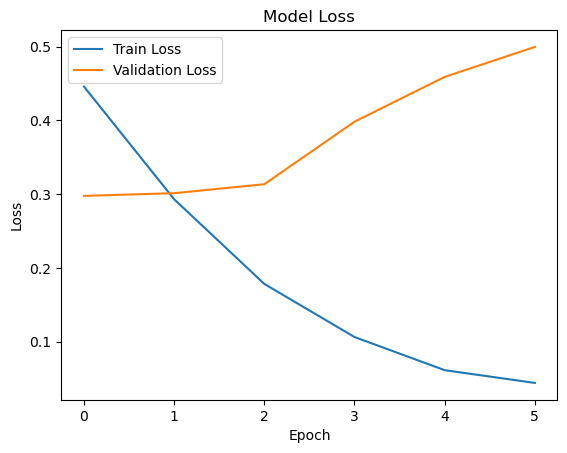

In [32]:
models = ['lstm' , 'gru', 'crnn']
for model_type in models:
    print(f"--------------------------------------------------------------------------{model_type}-----------------------------------------------------------------------")
    train_and_evaluate_model(
        model_type=model_type,
        X_train=X_train,
        y_train=y_train,
        X_test=X_test,
        y_test=y_test,
    )